In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from networkx.algorithms import bipartite

F_exp_dist = lambda x,lam: -np.log(1-x)/lam


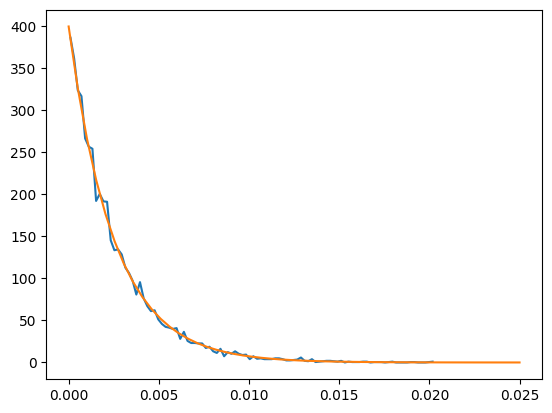

In [21]:

def hist(x, num_bins, label):
    n, bin_edges = np.histogram(x, bins=num_bins)
    bins_center= (bin_edges[0:num_bins]+ bin_edges[1:])/2
    n= n/np.sum(n)/(bin_edges[1]-bin_edges[0])
    # print(n.sum()*(bin_edges[1]-bin_edges[0]))
    plt.plot(bins_center,n,'-',markersize=2,label=label)
    return bins_center, n

num_pts = 10000
lam = 400
hist(F_exp_dist(np.random.rand(num_pts),lam),100," ");
x_plot = np.linspace(0,10/lam)
plt.plot(x_plot,lam*np.exp(-lam*x_plot))
plt.show()

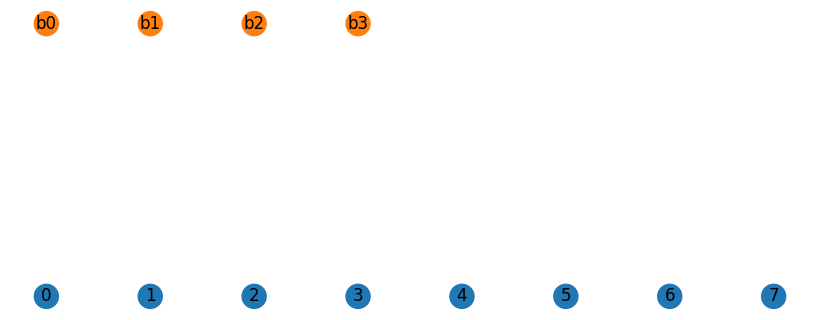

In [25]:
num_nodes = 8 # number of q nodes
num_bsms = 4 # number of BSMs


G = nx.Graph()
nodes_list = set(range(num_nodes))
bsms_list = set([f"b{s}" for s in range(num_bsms)])
G.add_nodes_from(nodes_list, bipartite=0)
G.add_nodes_from(bsms_list, bipartite=1)

# G.add_edge("b0",0)
# G.add_edge("b0",1)
# # bottom_nodes, top_nodes = bipartite.sets(G)
# top_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
# print(bsms_list)

color_dict = {0:'C0',1:'C1'}
color_list = [color_dict[i[1]] for i in G.nodes.data('bipartite')]

pos_nodes = {q: (q,0) for q in range(num_nodes)}
pos_bsms = {f"b{b}": (b,1) for b in range(num_bsms)}
pos = pos_nodes | pos_bsms


# plt.figure(figsize=(8,3))
# nx.draw(G, pos,  with_labels=True,  node_color = color_list)
# # nx.draw(G,  with_labels=True, node_color = color_list)
# plt.show()
# # for pair in gate_seq:

connections = []
for i in range(num_nodes):
    for j in range(i+1,num_nodes):
        connections.append((i,j))
# print(connections)

# switch_matrix = np.zeros((num_nodes,num_nodes), dtype=np.int8) 
# switch_config = np.zeros(num_nodes, dtype=np.int8) - 1


# bsm_stat = np.zeros(num_bsms,dtype=np.int8)
# node_stat = np.zeros(num_nodes,dtype=np.int8)
# num_gates = 10
# gate_seq = random.choices(connections, k=num_gates)
# for g in gate_seq:
#     print(g, node_stat)
#     if (bsm_stat==1).sum()== bsm_stat.shape:
#         break
#     if node_stat[g[0]]==1 or node_stat[g[1]]==1:
#         break
#     if len(np.argwhere(bsm_stat==0))>0:
#         bsm_avail = np.argwhere(bsm_stat==0)[:,0]
#     else:
#         bsm_avail = []
        
#     G.add_edge(g[0],f"b{bsm_avail[0]}")
#     G.add_edge(g[1],f"b{bsm_avail[0]}")
#     bsm_stat[bsm_avail[0]] = 1
#     node_stat[g[0]] = 1
#     node_stat[g[1]] = 1

plt.figure(figsize=(8,3))
nx.draw(G, pos,  with_labels=True,  node_color = color_list)
# nx.draw(G,  with_labels=True, node_color = color_list)
plt.show()

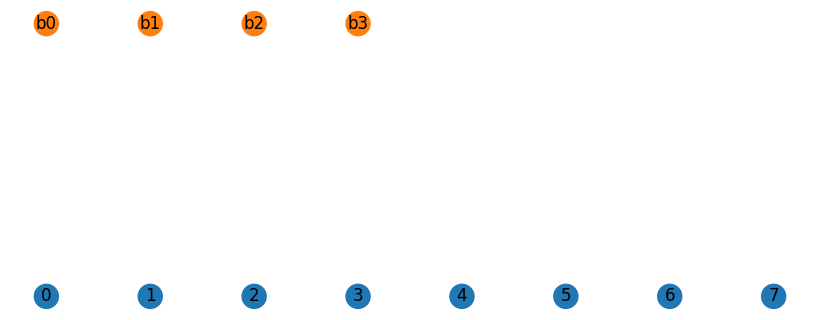

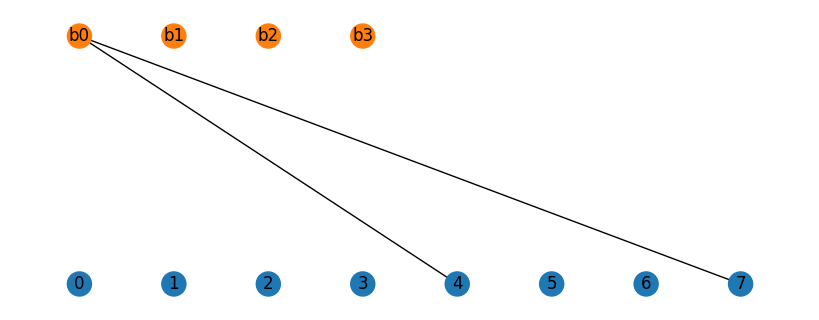

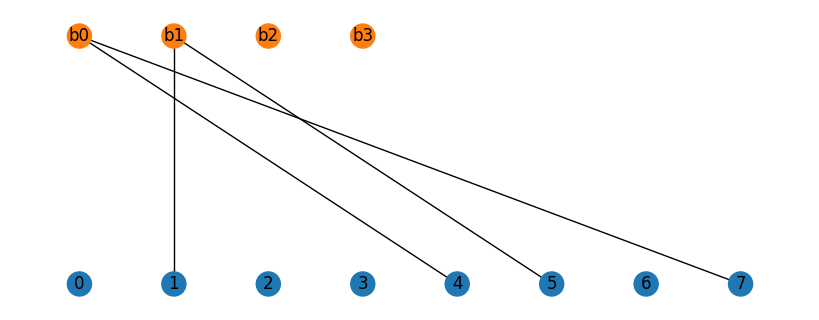

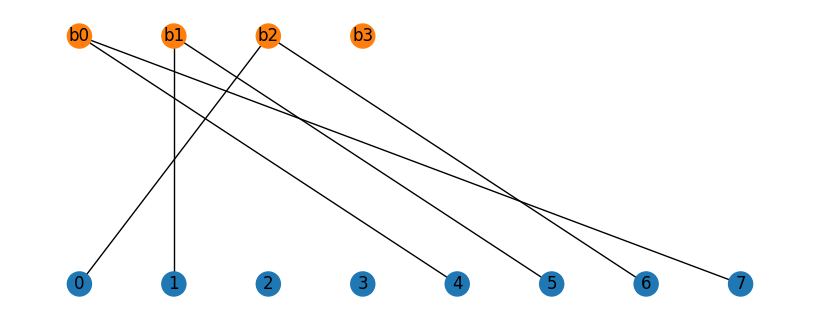

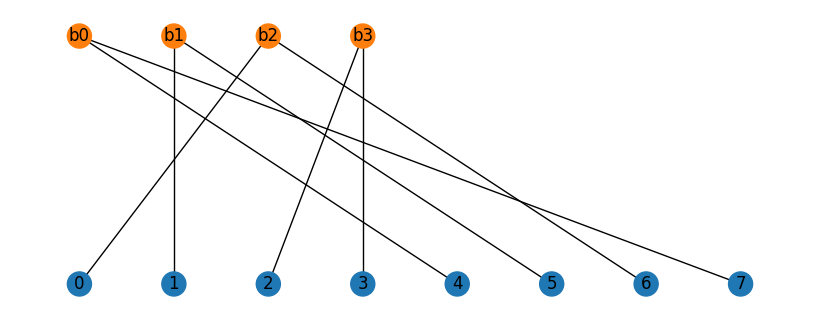

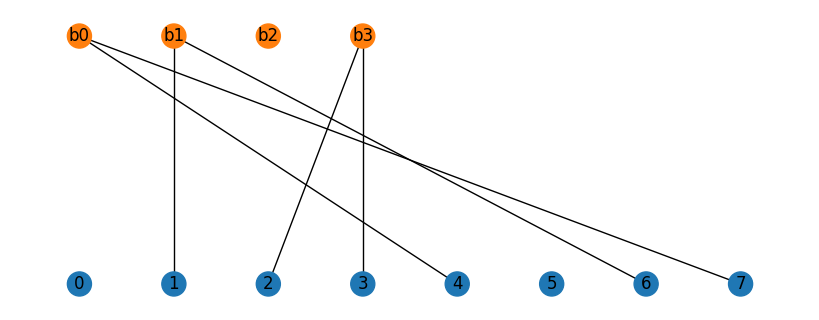

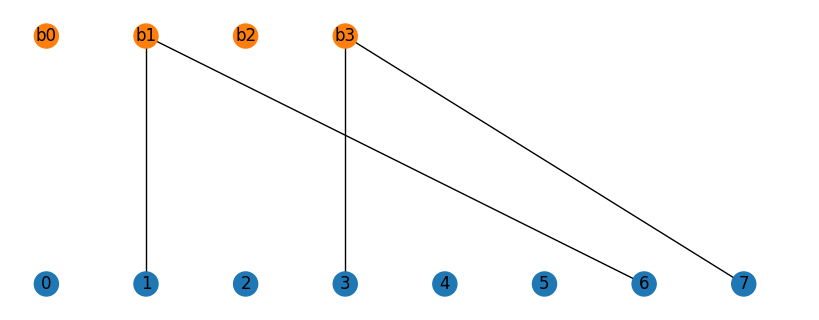

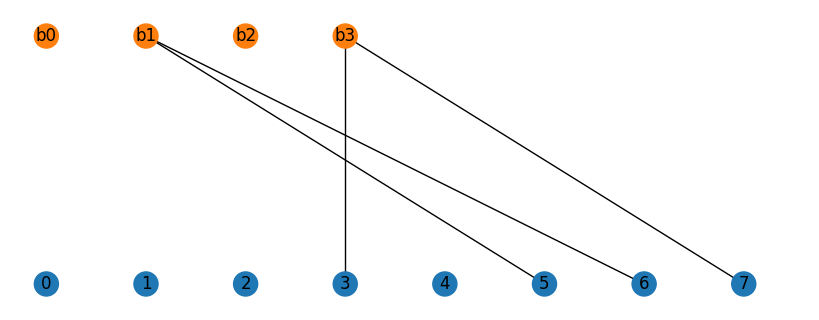

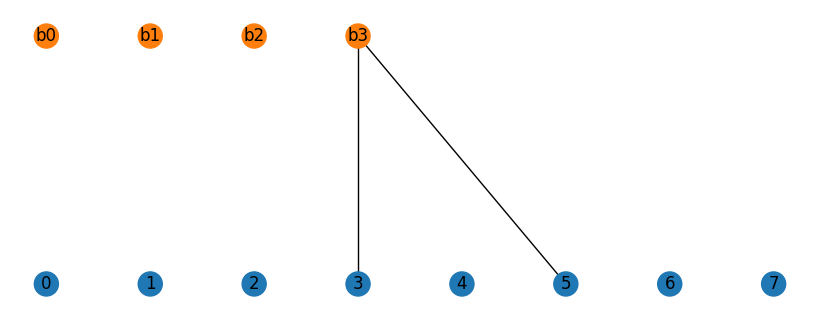

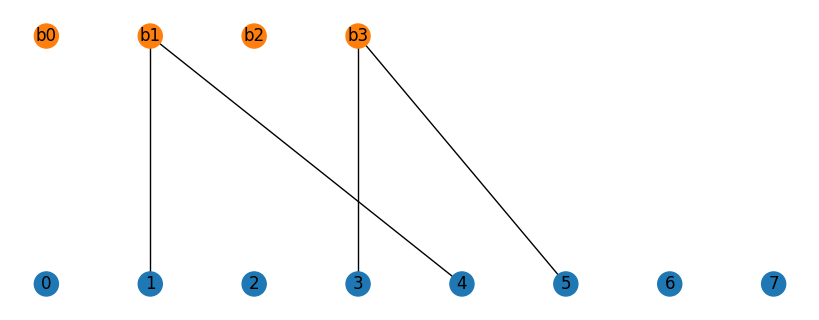

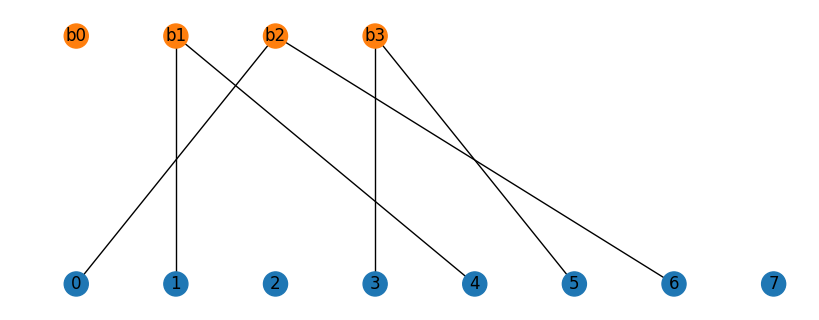

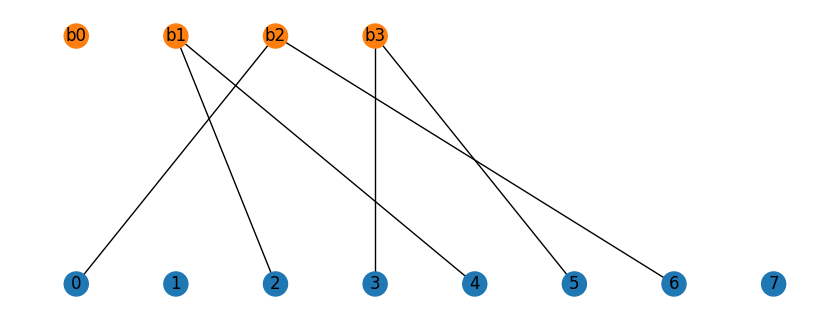

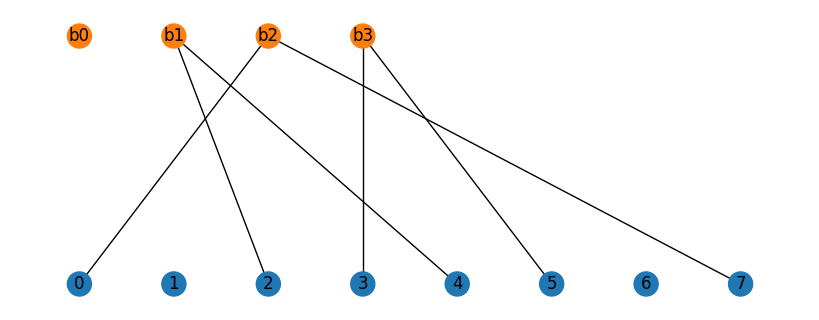

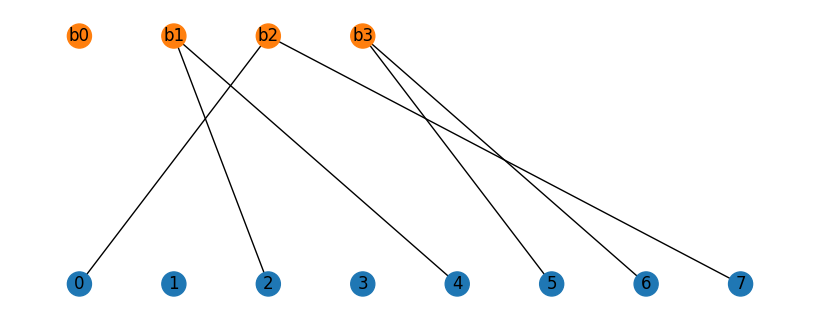

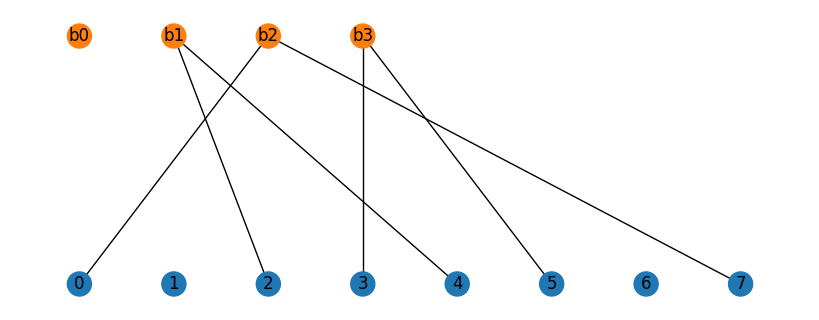

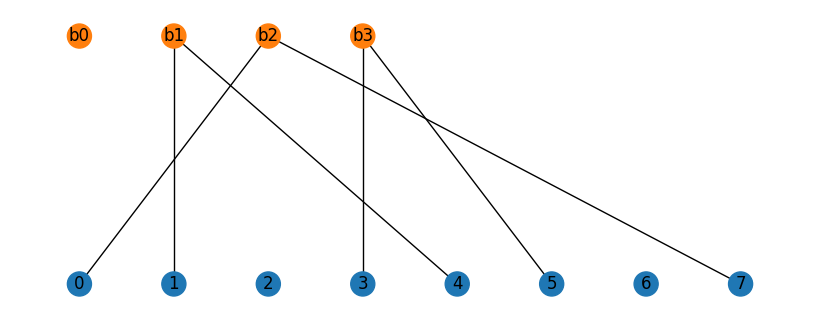

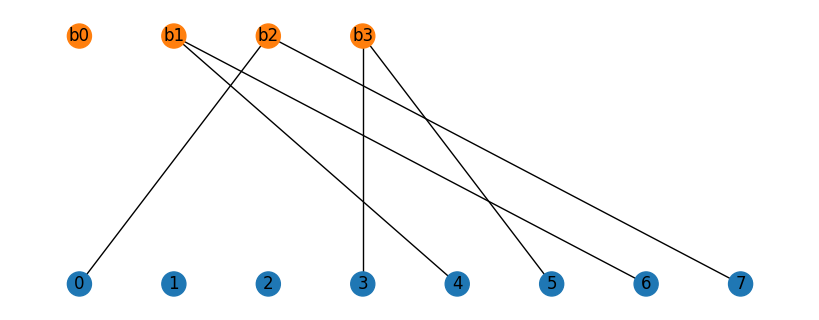

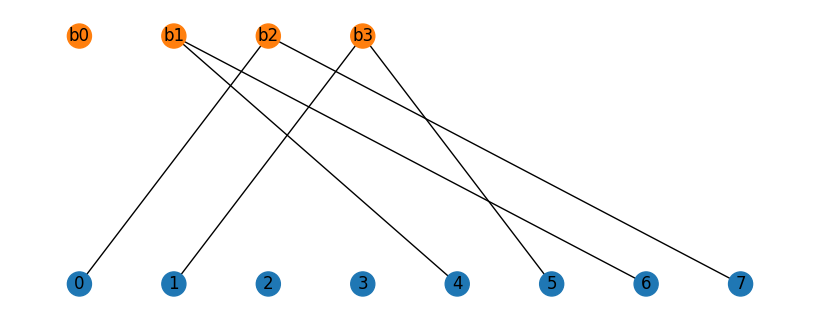

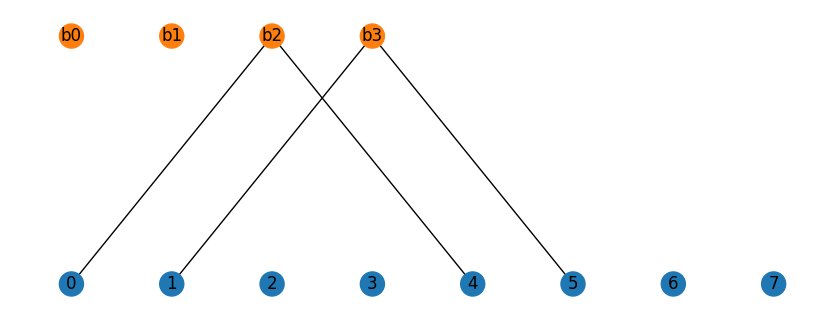

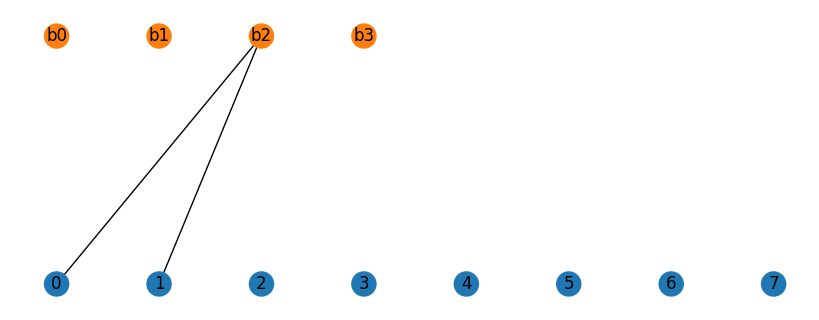

In [26]:

plt.figure(figsize=(8,3))
nx.draw(G, pos,  with_labels=True,  node_color = color_list)
# nx.draw(G,  with_labels=True, node_color = color_list)
plt.show()

# t_switch = 1e-3
# lam_ebit = 400
# F_exp_dist(np.random.rand(),lam_ebit)
gate_seq = random.choices(connections, k=20)
# print(gate_seq)

bsm_stat = np.zeros(num_bsms,dtype=np.int8)
for g in gate_seq:
    # print(g)

    g0_neighbors = [n for n in G.neighbors(g[0])]
    if len(g0_neighbors)>0:
        bsm_g0 = g0_neighbors[0]
        g0 = True
    else:
        g0 = False

    g1_neighbors = [n for n in G.neighbors(g[1])]
    if len(g1_neighbors)>0:
        bsm_g1 = g1_neighbors[0]
        g1 = True
    else:
        g1 = False

    if g0 and g1:
        if bsm_g0==bsm_g1:
            continue
        else:
            # G.remove_edge(g[1],bsm_g1)
            G.remove_node(bsm_g1)
            G.add_node(bsm_g1, bipartite=1)
            bsm_stat[int(bsm_g1.split("b")[-1])] = 0
            G.remove_node(bsm_g0)
            G.add_node(bsm_g0, bipartite=1)
            G.add_edge(g[0],bsm_g0)
            G.add_edge(g[1],bsm_g0)
    elif g0 and (not g1):
        G.remove_node(bsm_g0)
        G.add_node(bsm_g0, bipartite=1)
        G.add_edge(g[0],bsm_g0)
        G.add_edge(g[1],bsm_g0)

    elif g1 and (not g0):
        G.remove_node(bsm_g1)
        G.add_node(bsm_g1, bipartite=1)
        G.add_edge(g[0],bsm_g1)
        G.add_edge(g[1],bsm_g1)
    else:
        if len(np.argwhere(bsm_stat==0))>0:
            bsm_avail = np.argwhere(bsm_stat==0)[:,0].tolist()
            # print(bsm_avail)
            bsm_to_use = random.sample(bsm_avail, 1)[0]
            bsm_stat[bsm_to_use] = 1
            G.add_edge(g[0],f"b{bsm_to_use}")
            G.add_edge(g[1],f"b{bsm_to_use}")
        else:
            bsm_to_use = random.sample(list(bsms_list), 1)[0]
            G.remove_node(bsm_to_use)
            G.add_node(bsm_to_use, bipartite=1)
            G.add_edge(g[0],bsm_to_use)
            G.add_edge(g[1],bsm_to_use)


    # if node_stat[g[0]]==1:
    #     bsm_g = [n for n in G.neighbors(g[0])][0]
    #     print(g[0],bsm_g)
    #     G.remove_edge()
    # elif node_stat[g[1]]==1:
    #     bsm_g = [n for n in G.neighbors(g[1])][0]
    #     print(g[1],bsm_g)
    # else:
    # bsm_avail = np.argwhere(bsm_stat==0)[:,0]
    # G.add_edge(g[0],f"b{bsm_avail[0]}")
    # G.add_edge(g[1],f"b{bsm_avail[0]}")
    # bsm_stat[bsm_avail[0]] = 1
    # node_stat[g[0]] = 1
    # node_stat[g[1]] = 1

    plt.figure(figsize=(8,3))
    nx.draw(G, pos,  with_labels=True,  node_color = color_list)
    # nx.draw(G,  with_labels=True, node_color = color_list)
    plt.show()

    d_bsms, d_nodes = bipartite.degrees(G, nodes_list)
    for bsm_deg in d_bsms:
        assert (bsm_deg[1]== 0 or bsm_deg[1]== 2)
    for node_deg in d_nodes:
        assert (node_deg[1]== 0 or node_deg[1]== 1)
        


In [ ]:
# d_b, d_q = bipartite.degrees(G, nodes_list)
# print(d_b)
# for ds in d_b:
#     print(ds[1])

bsm_stat = np.zeros(num_bsms,dtype=np.int8)
node_stat = np.zeros(num_nodes,dtype=np.int8)
num_gates = 10
gate_seq = random.choices(connections, k=num_gates)
for g in gate_seq:
    print(g, node_stat)
    if (bsm_stat==1).sum()== bsm_stat.shape:
        break
    if node_stat[g[0]]==1 or node_stat[g[1]]==1:
        break
    bsm_avail = np.argwhere(bsm_stat==0)[:,0]
    G.add_edge(g[0],f"b{bsm_avail[0]}")
    G.add_edge(g[1],f"b{bsm_avail[0]}")
    bsm_stat[bsm_avail[0]] = 1
    node_stat[g[0]] = 1
    node_stat[g[1]] = 1

plt.figure(figsize=(8,3))
nx.draw(G, pos,  with_labels=True,  node_color = color_list)
# nx.draw(G,  with_labels=True, node_color = color_list)
plt.show()


In [ ]:

print(pos)

In [ ]:
lam = 2  # mean of the Poisson distribution
size = 100  # size of the sequence

query_seq = np.random.poisson(lam, size)
# print(query_seq)


k = query_seq[0]

random_entries = random.sample(connections, k)

for pair in random_entries:
    # if switch_config[pair[0]] > -1:
    #     switch_config[pair[0]] = 
    switch_matrix[pair[0],pair[1]] = 1

print("Randomly drawn entries:", random_entries)
print(switch_config)